In [1]:
#import packages
import pandas as pd
import nltk
import numpy as np
from numpy import random as npr
import time
import string
import sklearn
#from itertools import chain, imap
#nltk.download('punkt')
#nltk.download("stopwords")
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import re
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF

In [2]:
#read in data
df1 = pd.read_json('C:/Users/tommy/Downloads/final_50k_221118.json', lines=True)


In [3]:
df1

,awesome_biz_id,business_name,state,city,zip,content,posted_date,stars,webpage_url,menu_url,customer_rating_index,visibility_index,open_hours_raw,business_characteristics,is_entertainment,is_traffic
0,biz_000000,Trattoria Bruno,CA,San Francisco,94107.0,COVID-19 DELIVERY I caved. I'm not a fan of fo...,2020-07-29,4.0,None,None,NaN,2.31,"{'friday': [{'closedHours': '2100', 'openHours...","[""Third Party Food Delivery""]",False,True
1,biz_000000,Trattoria Bruno,CA,San Francisco,94107.0,4.5 stars I'm in carb heaven! Trattoria Bruno ...,2020-08-07,5.0,None,None,NaN,2.31,"{'friday': [{'closedHours': '2100', 'openHours...","[""Third Party Food Delivery""]",False,True
2,biz_000001,Remixed By Burnout,CA,Riverside,92506.0,Small Business Saturday and I went in to check...,2021-12-05,5.0,None,None,NaN,3.19,"{'friday': [{'closedHours': '1800', 'openHours...","[""Used Goods"",""Wheelchair Accessible"",""Accepts...",False,True
3,biz_000002,Sangio's Deli,CA,Temecula,92592.0,Food is prepared while you wait and large grou...,2019-11-06,5.0,http://cougarvineyards.com/deli,https://www.allmenus.com/ca/temecula/841906-sa...,4.33,2.98,"{'friday': [{'closedHours': '1800', 'openHours...","[""Take Out"",""Wheelchair Accessible"",""Wifi Avai...",False,True
4,biz_000002,Sangio's Deli,CA,Temecula,92592.0,Food is prepared while you wait and large grou...,2019-11-06,5.0,http://cougarvineyards.com/deli,https://www.allmenus.com/ca/temecula/841906-sa...,4.33,2.98,"{'friday': [{'closedHours': '1800', 'openHours...","[""Take Out"",""Wheelchair Accessible"",""Wifi Avai...",False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487940,biz_040802,Jessica's Party Supplies,CA,Los Angeles,90059.0,They cheated me and over charged me. They made...,2020-08-02,1.0,None,None,4.30,3.04,"{'friday': [{'closedHours': '1800', 'openHours...","[""Rental"",""Wheelchair Accessible"",""Alcohol""]",False,False
487941,biz_040802,Jessica's Party Supplies,CA,Los Angeles,90059.0,Very efficient and nice store worth visiting a...,2020-08-15,5.0,None,None,4.30,3.04,"{'friday': [{'closedHours': '1800', 'openHours...","[""Rental"",""Wheelchair Accessible"",""Alcohol""]",False,False
487942,biz_040802,Jessica's Party Supplies,CA,Los Angeles,90059.0,🤦🏽 ♀️I was at ROCK BOTTOM BOUTIQUE!.. but the ...,2020-09-05,1.0,None,None,4.30,3.04,"{'friday': [{'closedHours': '1800', 'openHours...","[""Rental"",""Wheelchair Accessible"",""Alcohol""]",False,False
487943,biz_040802,Jessica's Party Supplies,CA,Los Angeles,90059.0,Prices are very reasonable and customer servic...,2020-09-30,4.0,None,None,4.30,3.04,"{'friday': [{'closedHours': '1800', 'openHours...","[""Rental"",""Wheelchair Accessible"",""Alcohol""]",False,False


In [4]:
#Shuffle the data and take the first 30000 rows
df_shuffled = df1.sample(frac=1, random_state=39).reset_index(drop=True)
df2 = df_shuffled

In [5]:
df2

,awesome_biz_id,business_name,state,city,zip,content,posted_date,stars,webpage_url,menu_url,customer_rating_index,visibility_index,open_hours_raw,business_characteristics,is_entertainment,is_traffic
0,biz_002408,7-Eleven,CA,San Jose,95124.0,The inside of the fridges are absolutely disgu...,2020-12-26,1.0,None,None,3.03,3.18,"{'friday': [{'closedHours': '24hours', 'openHo...","[""Delivery"",""Hours Open 24 Indicator"",""Tobacco...",True,True
1,biz_036843,Mr. Lumpia And More,CA,Visalia,93277.0,"Gone here twice at the Visalia Farmers Market,...",2019-12-15,5.0,None,None,3.99,2.50,None,"[""Mobile Vendor"",""Catering"",""Accepts Credit Ca...",False,True
2,biz_045947,Duke Lite Smoke Shop,CA,Glendale,91202.0,Outstanding place. Amazing smoke shop that ope...,2021-09-29,5.0,None,None,4.94,2.85,None,"[""Tobacco Store"",""Tobacco"",""E-Cigarettes""]",True,False
3,biz_004755,Krispy Rice,CA,Studio City,91604.0,"The rice was brick hard, and the fish was quit...",2021-08-02,1.0,None,None,2.41,2.66,None,"[""Raw Seafood Served"",""Delivery"",""Wheelchair A...",False,True
4,biz_034895,Hero Complex Gallery,CA,Los Angeles,90019.0,I've purchased several prints from Hero Comple...,2019-10-14,5.0,None,None,4.41,3.56,"{'friday': [{'closedHours': '1800', 'openHours...","[""Internet Sales"",""Wheelchair Accessible"",""Acc...",False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487940,biz_043091,Kavali Night Club,CA,Long Beach,90805.0,Where can I start. So they told us we can star...,2019-05-27,1.0,None,None,3.08,2.68,"{'friday': [], 'monday': [], 'saturday': [], '...","[""Dance Floor"",""Entertainment"",""Wheelchair Acc...",True,False
487941,biz_019574,Fisherman's Sushi,CA,Port Hueneme,93041.0,"Great food, good prices, but AWFUL customer se...",2020-07-27,2.0,None,None,4.23,2.40,None,"[""Raw Seafood Served"",""Delivery"",""Alcohol"",""Be...",False,True
487942,biz_024244,AJ Hundal Mart,CA,West Sacramento,95691.0,(Translated by Google) Very good place to load...,2021-08-06,4.0,None,None,NaN,2.89,"{'friday': [{'closedHours': '2300', 'openHours...","[""Gasoline"",""Accepts NFC Mobile Payments"",""Whe...",False,True
487943,biz_026288,Hawaiian Fresh Seafood At Liberty Station,CA,San Diego,92106.0,I am a huge fan of the Hawaiian Fresh Seafood ...,2021-12-14,5.0,None,None,4.65,2.34,"{'friday': [{'closedHours': '1900', 'openHours...","[""Raw Seafood Served"",""Parking Available"",""Out...",False,True


In [6]:
#Combine comments by unique business id, keep only labels, business name, and comments
df3 = df2.groupby(df2["awesome_biz_id"],as_index=False).agg({"content":' '.join,"business_name":"first","is_entertainment":"max","is_traffic":"max"})

In [7]:
df3

,awesome_biz_id,content,business_name,is_entertainment,is_traffic
0,biz_000000,4.5 stars I'm in carb heaven! Trattoria Bruno ...,Trattoria Bruno,False,True
1,biz_000001,Small Business Saturday and I went in to check...,Remixed By Burnout,False,True
2,biz_000002,"Friends, Sangio's Deli makes some awesome Pizz...",Sangio's Deli,False,True
3,biz_000003,They do not make authentic Italian calzones. O...,Calzone,False,True
4,biz_000004,I am an Asian who lives in Weho. I have been t...,85 C Bakery Cafe,False,True
...,...,...,...,...,...
49995,biz_049995,It's wasn't bad as all. It's very slow and eve...,Empire Hookah Lounge,True,False
49996,biz_049996,This was the first of three stops on our Platy...,Auburn James Winery,False,False
49997,biz_049997,This is for the atmosphere.... To the owners -...,Kimbara,True,False
49998,biz_049998,Not really a bar. Got there at 10 and nothing....,W XYZ Bar,False,False


In [8]:
#Extract labels and predictors into separate dataframes
label = ["is_entertainment","is_traffic"]
labeldf = df3[["is_entertainment","is_traffic"]]
df4 = df3[["business_name","content"]]
name = ["business_name","content"]

In [9]:
print(labeldf)
print(df4)

       is_entertainment  is_traffic
0                 False        True
1                 False        True
2                 False        True
3                 False        True
4                 False        True
...                 ...         ...
49995              True       False
49996             False       False
49997              True       False
49998             False       False
49999              True       False

[50000 rows x 2 columns]
                    business_name  \
0                 Trattoria Bruno   
1              Remixed By Burnout   
2                   Sangio's Deli   
3                         Calzone   
4                85 C Bakery Cafe   
...                           ...   
49995        Empire Hookah Lounge   
49996         Auburn James Winery   
49997                     Kimbara   
49998                   W XYZ Bar   
49999  Minute Shops Liquor & Deli   

                                                 content  
0      4.5 stars I'm in carb heaven! T

In [10]:
#Tokenize comments and business names
dic1 = {}
WORD = re.compile(r'\w+')
def regTokenize(text):
    words = WORD.findall(text)
    return words
for i in [0,1]:
    arrx = []
    for j in range(0,len(df4[name[i]])):
        listx = regTokenize(df4[name[i]][j])
        arrx.append(listx)
    dic1[name[i]] = arrx

In [11]:
#Filter stopwords and stem
stop_words = set(stopwords.words("english"))
for i in range(len(string.punctuation)):    
    stop_words.add(string.punctuation[i])
stop_words.add("'s")
stop_words.add(".....")
stemmer = PorterStemmer()
for i in [0,1]:
    arrc = []
    for j in range(0,len(dic1[name[i]])):
        flist = []
        for z in dic1[name[i]][j]:
            if z.casefold() not in stop_words:
                flist.append(stemmer.stem(z))
        arrc.append(" ".join(flist))
    dic1[name[i]] = arrc

In [12]:
dic1

{'business_name': ['trattoria bruno',
  'remix burnout',
  'sangio deli',
  'calzon',
  '85 C bakeri cafe',
  'cheebapotshop com',
  'R erickson oil inc',
  'aladdin nut hous',
  'ampm',
  'perk coffe bar',
  'El mont liquor deli',
  'shell',
  'cv',
  'carmel galleri',
  'MB kazmo oil CO',
  'wfm coffe bar',
  '6 late food liquor',
  'jenni craig weight loss center',
  'calzon',
  'marukai',
  'wash N deliv',
  'shell',
  'ludlow 76 ga food mart',
  'morro ga',
  'domino pizza',
  'wall bed n',
  'food foundri',
  'cv',
  '7 eleven',
  'jack weir son',
  'three root mexican cocina',
  'exxon',
  'G sunglass',
  'fat citi',
  'reynosa applianc',
  'sam woo B B Q restauran',
  'littl red hen nurseri',
  'mainsid marin corp exchang',
  'zokari market',
  'cigarett',
  'sephora',
  'ampm',
  'chevron extra mile',
  'retro respawn',
  'express blind',
  'california chicken QQ cafe',
  'gnc',
  'papa murphi',
  'ogden cleaner malibu',
  'chevron',
  'circl market',
  'dean clean mobil dri c

In [13]:
#Generate TF-IDF matrix and combine the results of both business name and contents
tf_idf_model  = TfidfVectorizer(min_df=0.001)
bustf = dic1["business_name"]
tf_idf_vector1 = tf_idf_model.fit_transform(bustf)
tf_idf_array1 = tf_idf_vector1.toarray()
contf = dic1["content"]
tf_idf_vector2 = tf_idf_model.fit_transform(contf)
tf_idf_array2 = tf_idf_vector2.toarray()
X = np.hstack((tf_idf_array1,tf_idf_array2))

In [14]:
#Find the best nmf component
dic_comp = {}
for num_topics in range(1,31):
    nmf = NMF(n_components=num_topics)
    nmf.fit(X)
    doc_topic_matrix = nmf.transform(X)
    topic_term_matrix = nmf.components_
    #See the first 10 examples of each feature
    num_top_terms = 10
    feature_names = tf_idf_model.get_feature_names_out()
    '''for topic_idx, topic in enumerate(topic_term_matrix):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_terms - 1:-1]]))
        print()'''
    dfnmf = pd.DataFrame(doc_topic_matrix)
    #NMF without CV
    npr.seed(123)
    from sklearn.preprocessing import LabelEncoder
    from sklearn import model_selection, svm
    from sklearn.metrics import accuracy_score
    # perform encoding on training and testing dataset to differentiate between different labels and assign them to 0 or 1
    avg_f1 = 0
    for j in [0,1]:
        print(label[j])
        X_train, X_test, y_train, y_test = train_test_split(dfnmf, labeldf[label[j]], test_size=0.2, random_state=42)
        print(X_train.shape,y_train.shape)
        # create and fit the Naive Bayes model
        #nb_model = MultinomialNB()
        nb_model = GaussianNB()
        nb_model.fit(X_train, y_train)

        # make predictions on the test data
        y_pred = nb_model.predict(X_test)
        f1 = f1_score(y_test, y_pred)
        if j == 1 and (avg_f1 < f1/2 or avg_f1 > f1*2):
            avg_f1 = 0
            break
        avg_f1 += f1
    avg_f1/=2
    dic_comp[num_topics] = avg_f1
print(max(dic_comp,key=dic_comp.get))
    

is_entertainment
(40000, 1) (40000,)
is_traffic
(40000, 1) (40000,)
is_entertainment
(40000, 2) (40000,)
is_traffic
(40000, 2) (40000,)
is_entertainment
(40000, 3) (40000,)
is_traffic
(40000, 3) (40000,)
is_entertainment
(40000, 4) (40000,)
is_traffic
(40000, 4) (40000,)
is_entertainment
(40000, 5) (40000,)
is_traffic
(40000, 5) (40000,)
is_entertainment
(40000, 6) (40000,)
is_traffic
(40000, 6) (40000,)
is_entertainment
(40000, 7) (40000,)
is_traffic
(40000, 7) (40000,)
is_entertainment
(40000, 8) (40000,)
is_traffic
(40000, 8) (40000,)
is_entertainment
(40000, 9) (40000,)
is_traffic
(40000, 9) (40000,)
is_entertainment
(40000, 10) (40000,)
is_traffic
(40000, 10) (40000,)
is_entertainment
(40000, 11) (40000,)
is_traffic
(40000, 11) (40000,)
is_entertainment
(40000, 12) (40000,)
is_traffic
(40000, 12) (40000,)
is_entertainment
(40000, 13) (40000,)
is_traffic
(40000, 13) (40000,)
is_entertainment
(40000, 14) (40000,)
is_traffic
(40000, 14) (40000,)
is_entertainment
(40000, 15) (40000,)


KeyboardInterrupt: 

In [15]:
print(dic_comp)

{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.3179177206763414, 5: 0.334836359292881, 6: 0.0, 7: 0.43040381545364936, 8: 0.4068150761114819, 9: 0.37290279902232815, 10: 0.3386610946041921, 11: 0.33191431639958285, 12: 0.3366675449000268, 13: 0.3423920052368014, 14: 0.3436860056064337, 15: 0.3509333070354339, 16: 0.3578674239481291, 17: 0.35789031538939875, 18: 0.35292240787980766, 19: 0.3637354970845724, 20: 0.36447223878041646, 21: 0.3641208054104994, 22: 0.3660268687787077, 23: 0.3688002340684653, 24: 0.3824373438656551, 25: 0.38696871848880315}


In [16]:
#With NMF
dfnmf = pd.DataFrame(doc_topic_matrix)
dfnmf

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.002435,0.000000,0.000003,6.016499e-04,0.000000,0.000000,0.000000,0.000128,0.010182,0.000000,...,0.000000,0.000000,0.001003,0.002462,0.000000,0.000276,0.000000,0.000187,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000520,0.000000,0.000000,0.000166,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000088,0.024101,0.000000,0.000986,0.000000,0.000000
2,0.000000,0.003668,0.000000,4.286855e-04,0.002061,0.000000,0.000000,0.000000,0.015748,0.000532,...,0.000000,0.000000,0.000220,0.000000,0.000000,0.000000,0.000000,0.021051,0.000621,0.000000
3,0.000000,0.000000,0.000084,6.391775e-04,0.000000,0.000000,0.000183,0.000162,0.009366,0.000000,...,0.000075,0.000000,0.000000,0.000919,0.000000,0.004296,0.000000,0.000000,0.000000,0.000165
4,0.000000,0.000000,0.001119,1.734336e-03,0.000157,0.000000,0.003593,0.001383,0.003074,0.069504,...,0.002880,0.000000,0.000161,0.000000,0.000000,0.022513,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.000160,0.000126,0.000000,0.000000e+00,0.000000,0.005390,0.000000,0.000191,0.003905,0.000763,...,0.000000,0.003328,0.000000,0.000000,0.000000,0.022602,0.000000,0.010703,0.000000,0.003914
49996,0.001288,0.000000,0.000000,2.079884e-07,0.000000,0.000000,0.000000,0.000000,0.002717,0.000007,...,0.000000,0.000000,0.000350,0.000763,0.000430,0.003910,0.000000,0.104210,0.000000,0.000000
49997,0.001990,0.000167,0.000000,0.000000e+00,0.000000,0.000192,0.000117,0.000000,0.019239,0.000789,...,0.000000,0.004135,0.000000,0.000000,0.000000,0.004139,0.000000,0.002794,0.001478,0.044238
49998,0.000566,0.000000,0.001533,3.857141e-03,0.000000,0.000000,0.004954,0.001809,0.000000,0.000000,...,0.002514,0.000000,0.001443,0.000187,0.000000,0.016609,0.000000,0.000000,0.000000,0.000000


In [ ]:
#without NMF
X= pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,3642,3643,3644,3645,3646,3647,3648,3649,3650,3651
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
18720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.095956,0.0
18721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.116839,0.0,0.0,0.0,0.000000,0.0
18722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


is_entertainment
(14979, 3652) (14979,)
Accuracy: 0.62
[[1894 1307]
 [ 113  431]] : is the confusion matrix
0.24798619102416572 : is the precision score
0.7922794117647058 : is the recall score
0.3777388255915864 : is the f1 score
[12366, 5046, 6467, 2167, 10924, 4527, 6013, 12825, 11630, 9022, 5762, 17191, 9049, 8481, 17466, 10371, 17596, 16876, 13174, 13270, 7277, 5736, 8496, 17648, 18114, 15665, 12123, 15765, 12359, 13244, 5871, 6298, 14711, 12703, 2516, 15277, 11444, 6664, 7443, 17961, 8621, 11689, 6595, 3251, 11616, 15097, 12068, 12047, 10405, 15849, 17039, 3995, 15389, 7717, 7854, 3930, 9097, 17245, 4391, 5478, 6885, 5446, 6549, 14988, 18345, 828, 8573, 12166, 3526, 14671, 251, 12122, 13009, 15974, 17655, 16826, 17750, 13587, 7250, 9529, 4073, 1712, 7553, 7301, 12479, 7466, 12030, 18401, 15652, 9705, 2981, 852, 11396, 12811, 2152, 6208, 9313, 13003, 10204, 18022, 15547, 6267, 3194, 14756, 4115, 5792, 10864, 8941, 18196, 18369, 7142, 9489, 13542, 10384, 322, 9958, 18504, 2301, 632

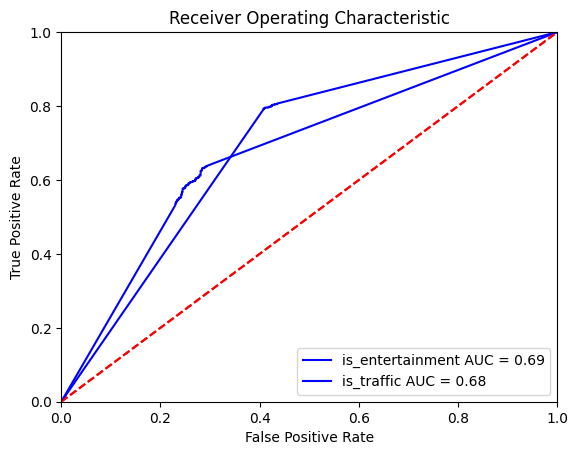

In [ ]:
#Without cross validation
npr.seed(123)
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score
# perform encoding on training and testing dataset to differentiate between different labels and assign them to 0 or 1
for j in [0,1]:
    print(label[j])
    X_train, X_test, y_train, y_test = train_test_split(X, labeldf[label[j]], test_size=0.2, random_state=42)
    print(X_train.shape,y_train.shape)
    # create and fit the Naive Bayes model
    #nb_model = MultinomialNB()
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)

    # make predictions on the test data
    y_pred = nb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')


    print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")


    print(precision_score(y_test, y_pred), ": is the precision score")

    print(recall_score(y_test, y_pred), ": is the recall score")

    print(f1_score(y_test, y_pred), ": is the f1 score")

    # Get the misclassified examples
    misclassified = X_test[y_pred != y_test]
    mis = misclassified.index.tolist()
    print(mis)
    # Print a few examples of misclassified comments
    for x in range(5):
        if x < len(mis): # Check if the index is within bounds
            predictor = df4[name].iloc[mis[x]]#[name[i]] # Replace 'comment' with the actual column name
            actual_label = labeldf[label[i]].iloc[mis[x]]#[label[j]] # Replace 'label' with the actual column name
            print(f"Predictor: {predictor}")
            print(f"Actual label: {actual_label}")
            print("\n")
        else:
            print("No more misclassified examples.")
            break

    probabilities = nb_model.predict_proba(np.array(X_test))
    predictions = probabilities[:, 1]
    fpr, tpr, threshold = roc_curve(y_test, predictions)
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label=label[j]+' AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
plt.show()

is_entertainment
(14979, 3652) (14979,)
Fitting 15 folds for each of 100 candidates, totalling 1500 fits
accuracy_score on test dataset :  0.8154873164218959
[[2510  691]
 [   0  544]] : is the confusion matrix
0.4404858299595142 : is the precision score
1.0 : is the recall score
0.6115795390668916 : is the f1 score
[5046, 4527, 6013, 2141, 8966, 10371, 13270, 7277, 5736, 17648, 6723, 15665, 12123, 6298, 2516, 11444, 1957, 17961, 11616, 11352, 10405, 15849, 17039, 3995, 3930, 5478, 6885, 5446, 14988, 828, 8573, 12166, 3526, 14671, 251, 12122, 13009, 17750, 13587, 9529, 4073, 1712, 7553, 7301, 15652, 2981, 11396, 12811, 9313, 13003, 18022, 5792, 10864, 18196, 7142, 2301, 15134, 3617, 12680, 17975, 3686, 8040, 4024, 2909, 17959, 16900, 1034, 16642, 14529, 15949, 12751, 16304, 736, 16006, 14781, 14323, 10146, 12923, 7270, 17777, 1290, 2518, 3532, 1297, 1429, 3798, 5115, 17702, 4981, 12349, 3919, 16089, 9859, 2605, 1611, 14438, 17705, 15879, 11233, 6466, 7039, 10885, 5000, 16881, 2308, 173

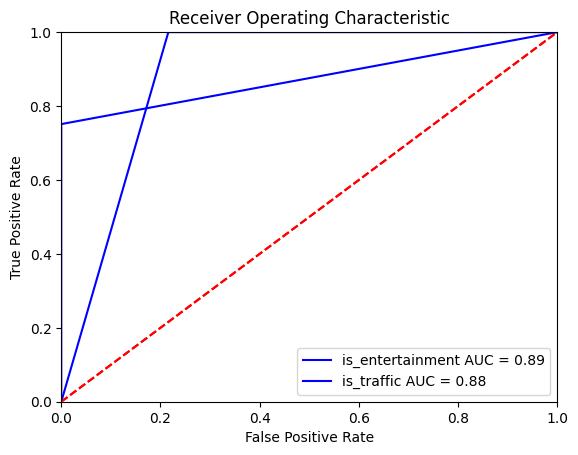

In [ ]:
#With Cross Validation
for j in [0,1]:
    print(label[j])
    X_train, X_test, y_train, y_test = train_test_split(X, labeldf[label[j]], test_size=0.2, random_state=42)
    print(X_train.shape,y_train.shape)
    # create and fit the Naive Bayes model
    #nb_model = MultinomialNB()
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)

    # make predictions on the test data
    y_pred = nb_model.predict(X_test)
    '''
    param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
    }
    nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
    nbModel_grid.fit(X_train, y_train)
    print(nbModel_grid.best_estimator_)
    y_pred = nbModel_grid.predict(X_test)'''
    # calculate accuracy
    #accuracy = (y_pred == y_test).sum() / len(y_test)
    
    from sklearn.model_selection import RepeatedStratifiedKFold

    cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                        n_repeats=3, 
                                        random_state=999)
    from sklearn.preprocessing import PowerTransformer
    params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

    gs_NB = GridSearchCV(estimator=nb_model, 
                         param_grid=params_NB, 
                         cv=cv_method,
                         verbose=1, 
                         scoring='f1')

    Data_transformed = PowerTransformer().fit_transform(X_test)

    gs_NB.fit(Data_transformed, y_test);
    gs_NB.best_params_
    gs_NB.best_score_
    results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
    results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']
    # predict the target on the test dataset
    predict_test = gs_NB.predict(Data_transformed)

    # Accuracy Score on test dataset
    accuracy_test = accuracy_score(y_test,predict_test)
    print('accuracy_score on test dataset : ', accuracy_test)
    
    print(confusion_matrix(y_test, predict_test), ": is the confusion matrix")
  

    print(precision_score(y_test, predict_test), ": is the precision score")

    print(recall_score(y_test, predict_test), ": is the recall score")

    print(f1_score(y_test, predict_test), ": is the f1 score")

    # Get the misclassified examples
    misclassified = X_test[predict_test != y_test]
    mis = misclassified.index.tolist()
    print(mis)
    # Print a few examples of misclassified comments
    for x in range(5):
        if x < len(mis): # Check if the index is within bounds
            predictor = df2[name].iloc[mis[x]]#[name[i]] # Replace 'comment' with the actual column name
            actual_label = labeldf[label[i]].iloc[mis[x]]#[label[j]] # Replace 'label' with the actual column name
            print(f"Predictor: {predictor}")
            print(f"Actual label: {actual_label}")
            print("\n")
        else:
            print("No more misclassified examples.")
            break

    probabilities = gs_NB.predict_proba(Data_transformed)
    predictions = probabilities[:, 1]
    fpr, tpr, threshold = roc_curve(y_test, predictions)
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label=label[j]+' AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
plt.show()

is_entertainment
(40000, 7) (40000,)
Accuracy: 0.90
[[8638  191]
 [ 817  354]] : is the confusion matrix
0.6495412844036698 : is the precision score
0.3023057216054654 : is the recall score
0.4125874125874126 : is the f1 score
[39489, 42724, 1414, 29282, 34304, 821, 5503, 47609, 22062, 28102, 17240, 37286, 29600, 41163, 6217, 20933, 40971, 48577, 38536, 44229, 49596, 36672, 43649, 26593, 42127, 23029, 44798, 31143, 48394, 48386, 44712, 17820, 36585, 44076, 20815, 42501, 13471, 6556, 41503, 38385, 4168, 2189, 31727, 48252, 20964, 49545, 48650, 4070, 9807, 46065, 6095, 39248, 44691, 3493, 47062, 37095, 44952, 49922, 985, 30095, 1388, 42206, 42811, 1003, 23006, 23493, 628, 20262, 44514, 28683, 20768, 1738, 9183, 22090, 29487, 44734, 38911, 416, 44755, 43812, 4229, 39227, 15073, 33985, 41546, 24912, 17969, 9889, 44142, 48061, 44888, 45698, 12514, 40832, 10026, 32504, 27731, 4273, 47403, 16451, 45912, 3593, 24778, 39665, 31512, 42627, 32732, 18203, 18726, 34002, 29517, 42644, 24675, 37277, 

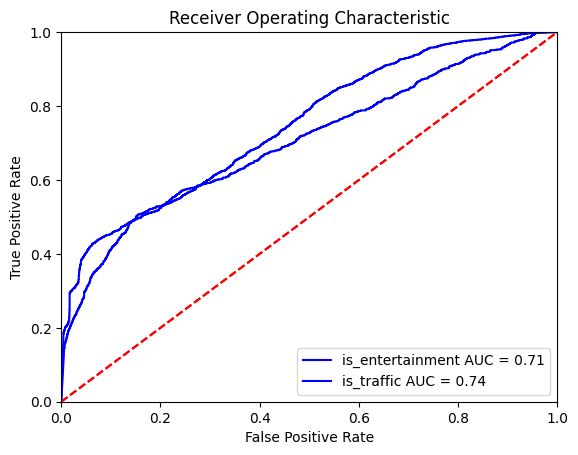

In [17]:
#NMF without CV
num_topics = max(dic_comp,key=dic_comp.get)
nmf = NMF(n_components=num_topics)
nmf.fit(X)
doc_topic_matrix = nmf.transform(X)
topic_term_matrix = nmf.components_
#See the first 10 examples of each feature
num_top_terms = 10
feature_names = tf_idf_model.get_feature_names_out()
'''for topic_idx, topic in enumerate(topic_term_matrix):
    print("Topic #%d:" % topic_idx)
    print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_terms - 1:-1]]))
    print()'''
dfnmf = pd.DataFrame(doc_topic_matrix)
npr.seed(123)
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score
# perform encoding on training and testing dataset to differentiate between different labels and assign them to 0 or 1
for j in [0,1]:
    print(label[j])
    X_train, X_test, y_train, y_test = train_test_split(dfnmf, labeldf[label[j]], test_size=0.2, random_state=42)
    print(X_train.shape,y_train.shape)
    # create and fit the Naive Bayes model
    #nb_model = MultinomialNB()
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)

    # make predictions on the test data
    y_pred = nb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')


    print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")


    print(precision_score(y_test, y_pred), ": is the precision score")

    print(recall_score(y_test, y_pred), ": is the recall score")

    print(f1_score(y_test, y_pred), ": is the f1 score")

    # Get the misclassified examples
    misclassified = X_test[y_pred != y_test]
    mis = misclassified.index.tolist()
    print(mis)
    # Print a few examples of misclassified comments
    '''for x in range(5):
        if x < len(mis): # Check if the index is within bounds
            predictor = df4[name].iloc[mis[x]]#[name[i]] # Replace 'comment' with the actual column name
            actual_label = labeldf[label[i]].iloc[mis[x]]#[label[j]] # Replace 'label' with the actual column name
            print(f"Predictor: {predictor}")
            print(f"Actual label: {actual_label}")
            print("\n")
        else:
            print("No more misclassified examples.")
            break'''

    probabilities = nb_model.predict_proba(np.array(X_test))
    predictions = probabilities[:, 1]
    fpr, tpr, threshold = roc_curve(y_test, predictions)
    roc_auc = auc(fpr, tpr)
    print("auc",roc_auc)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label=label[j]+' AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
plt.show()

is_entertainment
(40000, 7) (40000,)
Fitting 15 folds for each of 100 candidates, totalling 1500 fits
accuracy_score on test dataset :  0.8997
[[8561  268]
 [ 735  436]] : is the confusion matrix
0.6193181818181818 : is the precision score
0.37233134073441504 : is the recall score
0.4650666666666667 : is the f1 score
[39489, 34304, 821, 5503, 47609, 22062, 28102, 17240, 37286, 29600, 6217, 20933, 40971, 48577, 38536, 44229, 49596, 36672, 43649, 26593, 42127, 23029, 44798, 31143, 48394, 48386, 44712, 17820, 44076, 20815, 42501, 13471, 6556, 41503, 38385, 4168, 2189, 31727, 8718, 48252, 20964, 49545, 48650, 4070, 9807, 46065, 6095, 28559, 44691, 9331, 3493, 47062, 37095, 44952, 49922, 30095, 1388, 3426, 42811, 1003, 23006, 13098, 23493, 628, 20262, 44514, 28683, 20768, 1738, 9183, 22090, 29487, 38911, 416, 44755, 43812, 4229, 167, 8853, 15073, 33985, 31756, 41546, 24912, 17969, 9889, 48061, 44888, 45698, 12514, 40832, 32504, 27731, 31844, 4273, 47403, 16451, 23670, 45912, 3593, 24778, 39

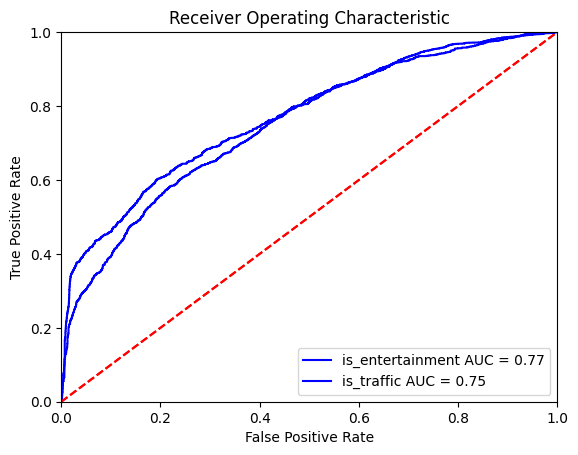

In [18]:
#nmf with CV
#With Cross Validation
for j in [0,1]:
    print(label[j])
    X_train, X_test, y_train, y_test = train_test_split(dfnmf, labeldf[label[j]], test_size=0.2, random_state=42)
    print(X_train.shape,y_train.shape)
    # create and fit the Naive Bayes model
    #nb_model = MultinomialNB()
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)

    # make predictions on the test data
    y_pred = nb_model.predict(X_test)
    '''
    param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
    }
    nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
    nbModel_grid.fit(X_train, y_train)
    print(nbModel_grid.best_estimator_)
    y_pred = nbModel_grid.predict(X_test)'''
    # calculate accuracy
    #accuracy = (y_pred == y_test).sum() / len(y_test)
    
    from sklearn.model_selection import RepeatedStratifiedKFold

    cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                        n_repeats=3, 
                                        random_state=999)
    from sklearn.preprocessing import PowerTransformer
    params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

    gs_NB = GridSearchCV(estimator=nb_model, 
                         param_grid=params_NB, 
                         cv=cv_method,
                         verbose=1, 
                         scoring='f1')

    Data_transformed = PowerTransformer().fit_transform(X_test)

    gs_NB.fit(Data_transformed, y_test);
    gs_NB.best_params_
    gs_NB.best_score_
    results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
    results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']
    # predict the target on the test dataset
    predict_test = gs_NB.predict(Data_transformed)

    # Accuracy Score on test dataset
    accuracy_test = accuracy_score(y_test,predict_test)
    print('accuracy_score on test dataset : ', accuracy_test)
    
    print(confusion_matrix(y_test, predict_test), ": is the confusion matrix")
  

    print(precision_score(y_test, predict_test), ": is the precision score")

    print(recall_score(y_test, predict_test), ": is the recall score")

    print(f1_score(y_test, predict_test), ": is the f1 score")

    # Get the misclassified examples
    misclassified = X_test[predict_test != y_test]
    mis = misclassified.index.tolist()
    print(mis)
    # Print a few examples of misclassified comments
    '''for x in range(5):
        if x < len(mis): # Check if the index is within bounds
            predictor = df2[name].iloc[mis[x]]#[name[i]] # Replace 'comment' with the actual column name
            actual_label = labeldf[label[i]].iloc[mis[x]]#[label[j]] # Replace 'label' with the actual column name
            print(f"Predictor: {predictor}")
            print(f"Actual label: {actual_label}")
            print("\n")
        else:
            print("No more misclassified examples.")
            break'''

    probabilities = gs_NB.predict_proba(Data_transformed)
    predictions = probabilities[:, 1]
    fpr, tpr, threshold = roc_curve(y_test, predictions)
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label=label[j]+' AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
plt.show()